<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Fast_Human_Pose_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fast Human Pose Estimation**

논문 링크: https://arxiv.org/abs/1811.05419

대부분의 pose estimation 모델은 하나같이 모델의 일반화 성능(model generalisation performance)을 개선하는 방법만 고려하고 심각한 효율성 문제는 제쳐두고 있다. 본 논문에서는 이러한 문제점을 지적하고 이를 해결하기 위해 **FPD(Fast Pose Distillation)** 전략을 제안한다.

대부분의 고성능 모델들은 hourglass 기반 모델들인데, 이런 모델들은 하나같이 기본적인 CNN 블록들이 layer당 채널 수가 많고 훈련하기 어렵기 때문에 소규모 network를 구축할 때 비효율적이다.

본 논문의 기여(contribute)를 요약하자면 다음과 같다.
1. human pose estimation의 효율성 문제를 조사했다.
2. 작은 CNN network를 효과적으로 훈련시킬 수 있는 FPD 모델 훈련 방법을 제안했다.
3. 만족스러운 acc를 위한 비용 효율적인(cost-effective) lightweight Hourglass network를 설계했다.

## **Fast Pose Distillation**

본 논문에서는 간단하게 human pose estimation을 먼저 간략하게 설명하고 한계점을 지적하며 이를 해결하는 아이디어를 제안한다.

본 논문에서 서술된 것과 같이 간단하게 human pose estimation에 대해 간단하게 알아보겠다. 이미 아는 사람은 skip해서 그림 Figure 1부터 보는 것을 추천한다.

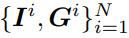

human pose estimation은 위와 같이 N명의 사람들이 엑세스할 수 있는 훈련 데이터 세트가 있을 때,

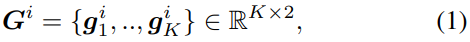

위와 같이 K개의 관절로 이루어진 label이 지정된다. 이는 일반적인 image pixel 수준의 regression 문제로 구분이 된다.

object loss function의 경우 MSE(Mean-Squared Error) 기반 loss function을 사용한다. ground-truth joint label을 나타내기 위해 label이 지정된 위치 z_k = (x_k, y_k) 주위에 Gaussian kernel을 중심으로 하여 각 single joint k(k ∈ {1, ..., K})에 대한 confidence map m_k를 생성한다.

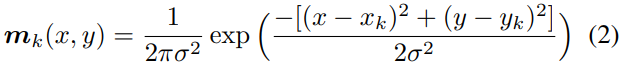

구체적으로 k번째 joint label에 대한 Gaussian confidence map m_k는 위의 식과 같이 표현된다. 위 식에서 x, y는 pixel 위치를 지정하고 hyper-parameter σ는 미리 지정된 공간 분산을 의미한다.

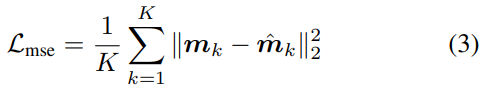

따라서 loss function은 위의 식과 같이 된다. 위 식에서 m_k는 위에서 설명했듯이 k번째 관절에 대한 confidence map이다.

그런 다음 SGD와 같은 최적화 알고리즘을 통해 deep CNN pose model을 최적화할 수 있다. 그러나 **이러한 기존의 방법들은 추론 효율성(inference efficiency)을 무시하고 모델의 성능을 최대화하기 위해 large depp NN에 너무 크게 의존**한다.

따라서 본 논문에서는 lightweight CNN architecture를 설계하고 효과적인 model 학습 전략을 제안해 이런 한계를 해결했다.

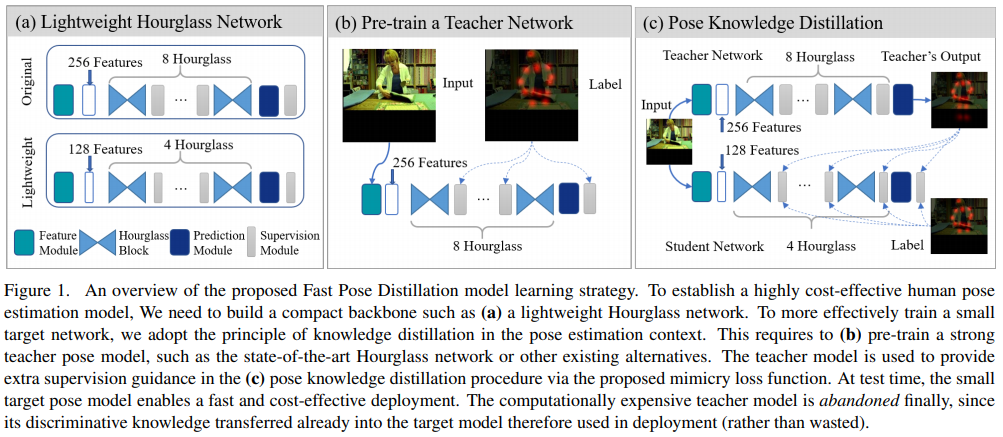

### **Compact Pose Network Architecture**

먼저, 모델 변형을 살펴보겠다.

Human pose CNN model들은 일반적으로 **Hourglass**를 많이 채택한다. 그러나 본 논문은 실험을 통해 해당 구조가 비용 효율적이지 않다는 것을 관찰했다. 예를 들어 Stacked hourglass networks for human pose estimation 논문에서는 모든 layer에 256개 채널이 있는 9개의 residual block이 있는 8개의 Hourglass를 사용했다.

본 논문에서는 여러 실험을 한 끝에 위의 그림 Figure 1의 (a) 부분과 같이 채널 수와 Hourglass를 절반으로 줄여 computational cost를 무려 1/6 가량으로 성능 차이가 별로 안나는 **Lightweight Hourglass Network**를 제안했다.

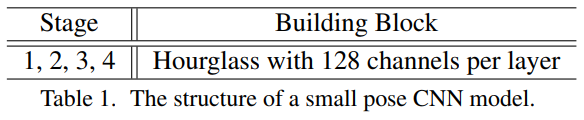

Lightweight Hourglass Network의 구조는 위의 표 Table 1과 같다.

### **Supervision Enhancement by Pose Distillation**

위에서 본 lightweight hourglass network와 같이 계산 비용이 저렴하고 빠른 network를 사용하는 것은 분명 매력이지만, **knowledge distillation strategy**에서 작은 student network가 큰 teacher network의 예측을 모방하는 것에 문제가 생길 수 있으며 얼마나 잘 작동하는지도 미지수이다.

따라서 본 논문에서는 이 질문에 대한 답을 구하기 위해 **pose structure knowledge distillation**를 제안한다.

Model Training Pipeline은 다음과 같다.
1. 큰 teacher pose model을 학습한다. 본 논문에서는 Stacked hourglass networks for human pose estimation에 나온 기존 hourglass network를 채택했다.
2. 그 다음 teacher model이 학습한 knowledge의 도움으로 student model을 학습한다. student model은 위에서 설명한 lightweight hourglass network이다.

자세한 지식 증류(distilling knowledge) 과정은 위의 그림 Figure 1의 (c) 부분에 나와있다. 지식 증류의 핵심은 적절한 **mimicry loss function**를 설계하는 것인데, 이전의 distillation function은 single-label를 기반으로 한 softmax cross-entropy loss를 위해 설계가 되었으며 2D 공간에서 구조화된 pose knowledge 지식을 전달하는데 적합하지 않는다.

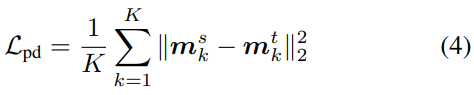

이런 문제점을 해결하기 위해 위의 식과 같은 **joint confidence map 전용 pose distillation loss function**을 설계했다. 위 식에서 m^s_k와 m^t_k는 각각 pretrained된 teacher model 및 in-training student target model에 의해 예측된 k번째 joint에 대한 confidence map이다.

그리고 teacher model과 student model간의 발산(divergence)를 측정하기 위해 식 (3)에 나와있는 MSE function을 사용했다.

#### **Overall Loss Function**

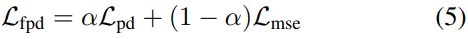

전체 loss function의 경우 위의 식 (3)과 (4)를 합쳐 최종적으로 위의 식 (5)와 같이 된다. 이때, α는 두 loss function 사이의 균형을 유지하는 균형 weight이다.

이처럼 target network는 L_mse에 의해 train sample의 label이 지정된 ground-truth 주석을 예측하고 L_pd에 의해 더 강력한 teacher model의 예측 구조와 일치하도록 학습이 된다.

**Further Remarks(추가 설명)**

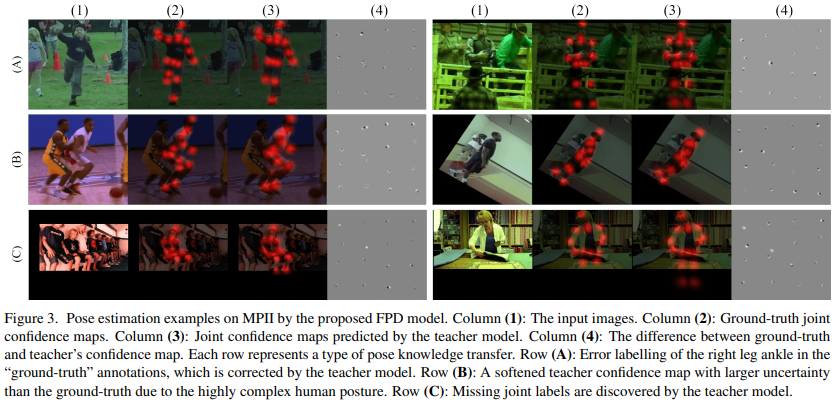

해당 loss function에 대한 부분을 보고 왜 본 논문에서 제안한 pose distillation loss function이 단순 label이 지정된 data만 학습하는 것과 비교하여 보다 일반화 가능한 대상 model을 학습하는 데 도움이 되는지 의문이 들 수 있다.

본 논문에선 이러한 의문에 대해 아래와 같이 답을 했다.

1. 수동 주석 프로세스(라벨링)에서 발생할 수 있는 body joint label error에 대해 teacher model이 통계적 학습 및 추론을 통해 일부 error를 완화할 수 있다. 따라서 label이 잘못 지정된 train sample의 오도 효과를 줄일 수 있다.(Figure 3 (A)).

2. 혼란스럽거나 어수선한 background 및 무작위 occlusion 상황과 같은 어려운 사례가 주어질 경우 teacher model이 이러한 어려운 sample을 설명함으로써 부드러운 학습 작업을 제공할 수 있다.(Figure 3 (B)).

3. teacher model은 원래 주석보다 더 완전한 joint label을 제공할 수 있으므로 더 정확한 감독을 추가로 제공할 뿐만 아니라 누락된 joint label의 오도를 완화한다.(Figure 3 (C)).

4. teacher's prediction을 맞추는 것보다 ground-truth confidence map을 맞추는 것이 더 어려울 수 있다.

5. 반면, teacher’s confidence map은 전체 dataset에서 미리 abstract knowledge을 encoding하므로 knowledge distillation 중에 모든 individual training sample 학습하는데 유용할 수 있다.

간단하게 요약하면 **잘못된 포즈 관절 주석(wrong pose joint annotations)을 처리할 수 있다는 것**이다.

## **Experiments**

실험 단계에서 사용한 dataset은 두 가지로 **MPII dataset**과 **Leeds Sports Pose(LSP) dataset**을 사용했다. 그리고 평가 지표는 **Percentage of Correct Keypoints(PCK)**를 사용했다.

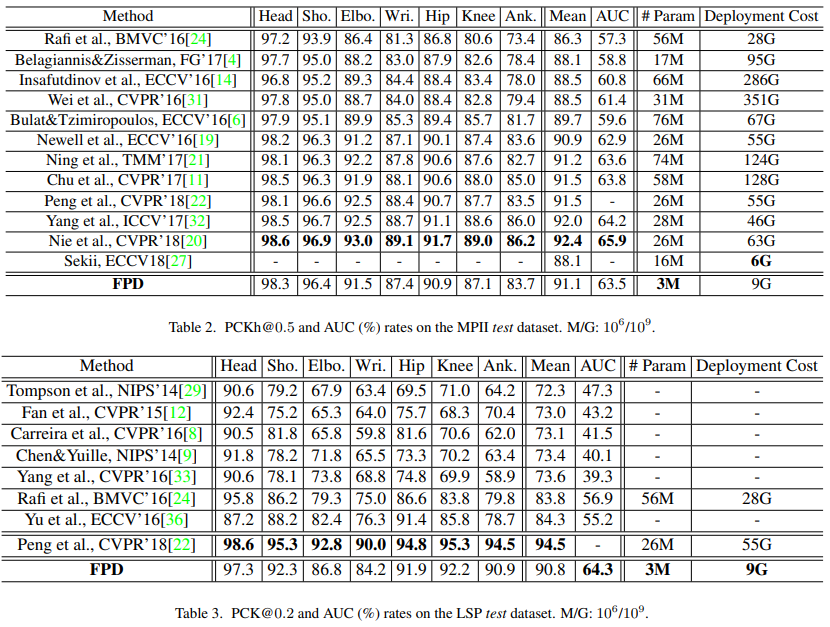

위의 표 Table 2는 MPII test dataset에 대해 PCKh@0.5 결과로 본 논문에서 제안한 FPD의 성능을 보여준다. 중요한 점은 model의 일반화 성능은 높이면서 동시에 매우 적은 연산량에 SOTA 모델과 큰 차이가 나지 않다는 것이다.

위의 표 Table 3는 LSP test dataset에 PCK@0.2 결과로 성능을 비교한 것이다. MPII와 달리 LSP는 dataset이 더 작기 때문에 FPD가 단순 연산량 측면 뿐만아니라 성능면에서도 가장 우수한 것을 알 수 있다.

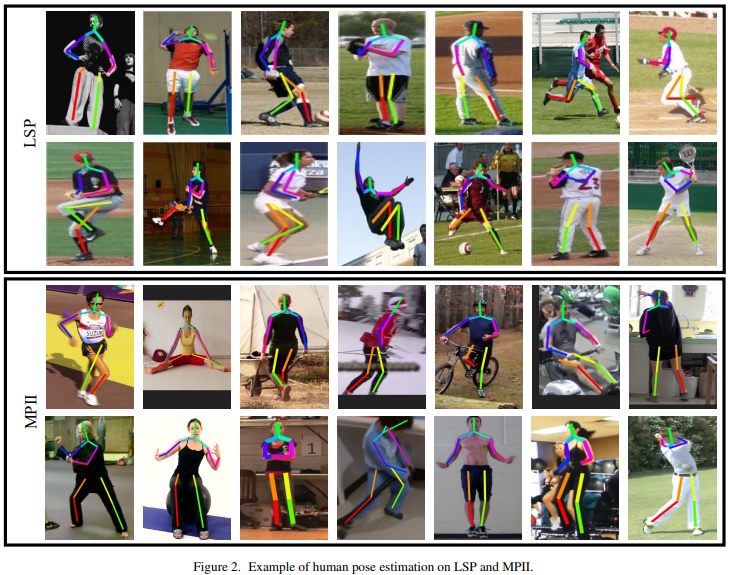

위의 그림 Figure 2는 각각 LSP와 MPII에 대해 pose estimation evaluations 결과를 보여준다.